In [1]:
# Bibliotecas além do gerenciador Anaconda
!pip install spacy
!python -m spacy download pt_core_news_sm

[+] Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [2]:
# Módulos básicos para manuseio de dados e arquivos
import pandas as pd
import numpy as np
import os
import re
import string
import unicodedata
from os.path import isfile, join

# Módulo para visualização de dados
import matplotlib.pyplot as plt
%matplotlib inline

# Módulos para processamento de linguagem
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Carregamento de textos

In [3]:
limited_news_path = r'Software\Fake.br-Corpus' #\fake_10 or \true_10
news_path = r'Software\Fake.br-Corpus\full_texts' #\fake or \true

paths = [limited_news_path, news_path]

In [4]:
def sortDir(dir_path: str, is_meta=False) ->list:
    '''
    Ordena os arquivos dentro de dir_path e os retorna no formato de lista.
    '''
    if is_meta:
        number_separator = "-meta.txt"
    else:
        number_separator = ".txt"

    first_list = os.listdir(dir_path)
    int_list = [int(element.split(number_separator)[0]) for element in first_list]
    int_list.sort()
    final_list = [(str(element) + number_separator) for element in int_list]

    return final_list

def txtToDataframe(path, is_limited=True):
    '''
    Function for converting full texts to a single DataFrame.
    '''
    if is_limited:
        true_files = [path+"\\true_10\\"+f for f in sortDir(dir_path = path+'\\true_10') if isfile(join(path+'\\true_10', f))]
        fake_files = [path+"\\fake_10\\"+f for f in sortDir(dir_path = path+'\\fake_10') if isfile(join(path+'\\fake_10', f))]
    else:
        true_files = [path+"\\true\\"+f for f in sortDir(dir_path = path+'\\true') if isfile(join(path+'\\true', f))]
        fake_files = [path+"\\fake\\"+f for f in sortDir(dir_path = path+'\\fake') if isfile(join(path+'\\fake', f))]
    
    texts = []
    labels = []
    
    for file in true_files:
        with open(file, encoding='utf-8') as f:
            texts.append(f.read())
            labels.append('true')
    for file in fake_files:
        with open(file, encoding='utf-8') as f:
            texts.append(f.read())
            labels.append('fake')
            
    df = pd.DataFrame(list(zip(texts,labels)),columns=['texts','labels'])
    
    # Com esta função, textos e labels foram inseridos em um DataFrame de maneira sequencial. Todas as notícias verdadeiras vêm
    # ANTES do bloco de notícias falsas.
    
    return df

def appendMetadata(path,df, is_limited=True):
    '''
    Function for appending metadata to previously generated news DataFrame.
    '''
    if is_limited:
        true_meta = [path+"\\true-meta-information-10\\"+f for f in sortDir(dir_path = path+'\\true-meta-information-10',is_meta=True) if isfile(join(path+'\\true-meta-information-10', f))]
        fake_meta = [path+"\\fake-meta-information-10\\"+f for f in sortDir(dir_path = path+'\\fake-meta-information-10',is_meta=True) if isfile(join(path+'\\fake-meta-information-10', f))]
    else:
        true_meta = [path+"\\true-meta-information\\"+f for f in sortDir(dir_path = path+'\\true-meta-information',is_meta=True) if isfile(join(path+'\\true-meta-information', f))]
        fake_meta = [path+"\\fake-meta-information\\"+f for f in sortDir(dir_path = path+'\\fake-meta-information',is_meta=True) if isfile(join(path+'\\fake-meta-information', f))]
    

    #true_meta e fake_meta são listas com todas os paths para arquivos de metadata.
    
    columns = ["author", "source", "category", "date","tokens","words_without_punctuation","types","number_of_links","uppercase_words","verbs","subjuntive_imperative","nouns","adjectives","adverbs","modal_verbs","singular_first_and_second_personal_pronouns","plural_first_personal_pronouns","pronouns","pausality","characters","avg_sentence_length","avg_word_length","percentage_of_spelling_errors","emotiveness","diversity"]
    
    true_metadata = pd.DataFrame(columns=columns)
    fake_metadata = pd.DataFrame(columns=columns)
    
    for file in true_meta:
        #print(file)
        aux = pd.read_csv(file, header=None, sep = '\n').transpose()
        aux.columns = columns
        true_metadata=true_metadata.append(aux)
        
        
    for file in fake_meta:
        #print(file)
        aux = pd.read_csv(file, header=None, sep = '\n').transpose()
        aux.columns = columns
        fake_metadata=fake_metadata.append(aux)
        
    
    metadata = pd.DataFrame(columns=columns)
    metadata = metadata.append(true_metadata,ignore_index=True)
    metadata = metadata.append(fake_metadata,ignore_index=True) 


    complete_df = pd.concat([df,metadata],axis=1)
    # Este DataFrame possui todos os textos/labels (2 colunas) e metadata (25 colunas).
    
    return complete_df

In [5]:
ai = int(input('''0 - Base com 10 notícias verdadeiras e 10 notícias falsas
1 - Base completa de notícias
'''))

path = paths[ai]

if ai == 0:
    data = txtToDataframe(path) # Dataframe contendo notícias e labels.
    complete_data = appendMetadata(path,data) # Dataframe contendo notícias, labels e metadata.
else:
    data = txtToDataframe(path,is_limited=False)
    complete_data = appendMetadata(path,data,is_limited=False)

0 - Base com 10 notícias verdadeiras e 10 notícias falsas
1 - Base completa de notícias
1


In [6]:
complete_data.shape

(7200, 27)

In [7]:
complete_data

,texts,labels,author,source,category,date,tokens,words_without_punctuation,types,number_of_links,...,singular_first_and_second_personal_pronouns,plural_first_personal_pronouns,pronouns,pausality,characters,avg_sentence_length,avg_word_length,percentage_of_spelling_errors,emotiveness,diversity
0,﻿O Podemos decidiu expulsar o deputado federa...,true,Naira Trindade,http://politica.estadao.com.br/blogs/coluna-do...,politica,13/12/2017,168,148,107,None,...,0,0,7,3.33333,761,24.6667,5.14189,0.0,0.134328,0.722973
1,Em evento realizado nesta terça-feira para div...,true,Estadão Conteúdo,http://esportes.estadao.com.br/noticias/futebo...,sociedade_cotidiano,26/12/2017,349,294,182,None,...,0,0,29,2.75,1477,14.7,5.02381,0.0,0.325758,0.619048
2,﻿Após o prefeito de Manaus Arthur Virgílio (PS...,true,Juliana Diógenes,"http://politica.estadao.com.br/noticias/geral,...",politica,26/12/2017,249,204,128,None,...,3,0,8,3.0,1019,13.6,4.9951,0.0147059,0.16,0.627451
3,﻿Doria vai receber Zé Celso após reunião com r...,true,Mônica Bergamo,http://www1.folha.uol.com.br/colunas/monicaber...,politica,11/1/2018,170,147,102,None,...,0,0,7,2.875,700,18.375,4.7619,0.0,0.0694444,0.693878
4,"Gustavo Pedreira Ferraz, que admitiu buscar ma...",true,Luiz Vassallo E Breno Pires,http://politica.estadao.com.br/blogs/fausto-ma...,politica,28/12/2017,389,341,181,None,...,0,0,14,2.66667,1587,18.9444,4.65396,0.00879765,0.11039,0.530792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,Deputado do PT não sabia que estava sendo film...,fake,None,https://www.diariodobrasil.org/deputado-do-pt-...,politica,03/10/2015,208,175,120,0,...,1,2,8,2.75,852,14.5833,4.86857,0.0,0.179487,0.685714
7196,Cunha cancelou a viagem à Itália porque poderi...,fake,None,https://www.diariodobrasil.org/cunha-cancelou-...,politica,01/10/2015,263,240,136,1,...,2,0,10,3.28571,1197,34.2857,4.9875,0.00416667,0.151261,0.566667
7197,"Mulher bêbada invade Planalto e diz que é ""mar...",fake,None,https://www.diariodobrasil.org/mulher-bebada-i...,sociedade_cotidiano,13/09/2012,111,98,68,0,...,0,0,4,1.85714,467,14.0,4.76531,0.0,0.170213,0.693878
7198,"Há 400 anos, Nostradamus previu a vitória de ...",fake,None,https://www.diariodobrasil.org/ha-400-anos-nos...,tv_celebridades,03/09/0201,205,174,116,0,...,0,0,15,3.1,834,17.4,4.7931,0.0,0.263158,0.666667


## Analisando Base de notícias

In [8]:
# Verificando tamanho de notícias (plotar histograma contendo as quantidades de notícias )


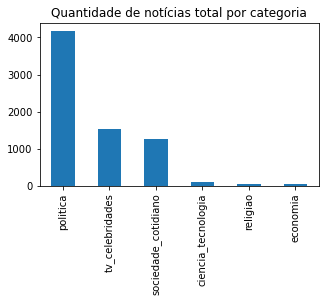

In [9]:
# Verificando assuntos

ax = complete_data['category'].value_counts().plot(kind='bar',
                                    figsize=(5,3),
                                    title="Quantidade de notícias total por categoria")

## Extraindo features

##### Bag-of-words
O Bag-of-words realiza uma contagem da quantidade de palavras existentes em um conjunto grande de textos. Para utilizar o efeito de considerar palavras com o mesmo significado, devemos pré-processar os textos e lematizar cada palavra.

In [10]:
# Carregando o pacote de língua portuguesa para o processador Spacy
nlp = spacy.load('pt_core_news_sm')

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
# Defininido funções de preprocessamento

def removePunct(text):
    '''
    Removes any punctuation included in string.punctuation.
    '''
    translator = text.maketrans({key:'' for key in string.punctuation+'“”'}) # Translates any punctuation into ''
    return text.translate(translator)

def removeNumbers(text):
    '''
    Removes any number character in text.
    '''
    return re.sub('[0-9]', '' , text) # Translates any number into ''

def removeStopWords(string):
    '''
    Removes any portuguese stopwords, using Spacy's standard package.
    '''
    doc = nlp(string)
    return ' '.join([token.text for token in doc if token.is_stop is False])

def lemmatize(string):
    '''
    Lemmatizes text word-by-word. Notice that lemmatizing is not as harsh as stemming, which makes the final text easier to read and understand in common language.
    '''
    doc = nlp(string)
    return ' '.join([token.lemma_ for token in doc])

def prep(string, useStopWords = True, lemma = True):
    '''
    Executes previously defined preprocessing in text.
    '''

    result = removeNumbers(removePunct(string)).lower()
    
    if useStopWords and lemma:
        doc = nlp(result)
        result = ' '.join([token.lemma_ for token in doc if token.is_stop is False])
    elif useStopWords:
        doc = nlp(result)
        result = ' '.join([token.text for token in doc if token.is_stop is False])
    elif lemma:
        doc = nlp(result)
        result = ' '.join([token.lemma_ for token in doc])
    return result.replace('\n',"")

In [13]:
text = "Comparado a Einstein, garoto de 11 anos quer tornar humanos imortais. Para o jovem, a física quântica é a primeira peça desse quebra-cabeça"

print(prep(text))

comparar einstein garoto   ano tornar humano imortal jovem física quântico peça quebracabeça


In [14]:
text = '''Nós somos lá de São Carlos, viemos aqui pra zonear.
No esporte, nós somos bosta, nosso negócio é a cachaça. E mesmo, que nós não ganhe, que nós apanhe, vamos brindar.
A pinga, queremos com limãaaaaao. Mulheres, com muito mais tesãaaaaao. Se um dia a EESC amada precisar da macacada, puta merda, que cagada, 1,2,3,4.
Como é legal, calcular a integral. Mesmo sem grafite, calculamos o limite.'''

print(prep(text))

Carlos viemos pra zonear  esporte bosta negócio cachaça ganhe apanhar ir brindar  pinga querer limãaaaaao mulher tesãaaaaao dia eesc amar precisar macacada puta merdo cagar  legal calcular integral grafite calcular limite


In [15]:
text_news = '''A Petrobras anunciou nesta segunda-feira (9) que vai elevar o preço do diesel para as distribuidoras. O preço médio do litro vai passar de R$ 4,51 para R$ 4,91 a partir de terça (10), um aumento de 8,87%.

Os preços da gasolina e do gás de cozinha não serão alterados.

Segundo a petroleira, o diesel não sofria reajuste há 60 dias – desde 11 de março. Naquele momento, diz a Petrobras, a alta refletia "apenas parte da elevação observada nos preços de mercado".'''

print(prep(text_news))

petrobra anunciar segundafeira   elevar preço diesel distribuidora preço médio litro passar r   r   terça   aumento  preço gasolina gás cozinha ser alterar  petroleira diesel sofrer reajuste há   dia –   março petrobra alta refletir elevação observar preço mercado


In [16]:
def removeMinFreq(data, features, min_freq = 1):
    # Realiza a soma da frequência de cada palavra da matriz vetorizada
    cols_sum = np.sum(data, axis=0)

    del_indexes = []
    # Analisa cada valor das contagens de frequência do cols_sum, assignando um índice i, e salva o índice em del_indexes[]
    # quando a contagem for acima da min_freq
    for i, val in zip(range(len(cols_sum)), cols_sum):
        if val < min_freq:
            del_indexes.append(i)
            
    data = np.delete(data,del_indexes,1) # Deleta coluna
    features = np.delete(features,del_indexes,0) # Deleta linha
    return (data, features)


def normalizeData(data):
    rows_sum = np.sum(data, axis=1)
    data = (data.T / rows_sum).T
    return data


def loadCount(texts, min_freq = 1, binary = False, normalize = True):

    # Instanciando o CountVectorizer
    vectorizer = CountVectorizer(input = 'content', preprocessor = prep, encoding='utf-8', binary = binary);
    
    # Aplicando processo de vetorização
    data = np.array(vectorizer.fit_transform(text_list).todense());
    features = np.array(vectorizer.get_feature_names())
    
    # Se min_freq for 1, então todos os tokens são considerados
    if(min_freq > 1):
        data, features = removeMinFreq(data, features, min_freq)
    if(normalize):
        data = normalizeData(data)

    return pd.DataFrame(data,columns = features)

def loadTfidf(texts):

    # Instanciando o Tf-Idf como vetorizador
    vectorizer = TfidfVectorizer(input = 'content', preprocessor = prep, encoding='utf-8')
    
    data = np.array(vectorizer.fit_transform(texts).todense());
    features = np.array(vectorizer.get_feature_names())
    
    return pd.DataFrame(data,columns = features)

In [35]:
# Utilizando as funções definidas previamente, criamos dataframes para o bag-of-words (frequência geral e TF-IDF).

text_list = [prep(item) for item in complete_data['texts'].to_list()]


In [100]:
text_list[1]

'evento realizar terçafeira divulgar jogo estrela amistoso beneficente ser realizar estádio maracanã rio janeiro zico questionar ano flamengo ídolo clube poupar crítica montagem elenco  visão investimento fazer surtir efeito campo achar equipe supervalorizar falar reclamar fácil trazer muito gente competição mudança constante lesão funcionar  avaliação zico faltar trabalho melhor avaliação jogador contratar especialmente vir futebol exterior futebol precisar seguir frente analisar investimento principalmente jogador exterior preciso rendimento questão saúde alertar infelizmente acontecer jogador Flamengo investir  zico avaliar diretoria precisar preocupar trazer jogador identificar clube reta temporada criticar suposto garra atleta precisar representar camisa flamengo história clube dizer preciso entendido flamengo clube diferente  resultado ano terminar maneira frustrante torcedor lógico objetivo principal atuação libertador acontecer consequentemente conseguir chegar sulamericana che

In [68]:
noticias_true = [len(text_list[i].split()) for i in range(0,3600)]
avgt = sum(noticias_true)/len(noticias_true)
print(avgt)

543.5586111111111


In [85]:
std_t =(np.std(noticias_true))
print(std_t)

328.0765805049924


In [71]:
noticias_fake = [len(text_list[i].split()) for i in range(3600,7200)]
avgf = sum(noticias_fake)/len(noticias_fake)
print(avgf)

94.64472222222223


In [86]:
std_f = (np.std(noticias_fake))
print(std_f)

61.88419875443484


In [118]:
count = 0
for i in noticias_fake:
    if i < 500:
        count = count + 1
print(count)

3591


In [99]:
#distância de 0.5 desvio padrão true

desvio1_true = []
minlim = avgt-(0.5*std_t)
minlim = minlim.astype(int)
maxlim = avgt+(0.5*std_t)
maxlim = maxlim.astype(int)

for i in noticias_true:
    if i > minlim & i < maxlim:
        desvio1_true.append(i)
range_t = len(desvio1_true)/3600
print(range_t)

0.875


In [94]:
#distância de 1 desvio padrão true

desvio1_true = []
minlim = avgt-std_t
minlim = minlim.astype(int)
maxlim = avgt+std_t
maxlim = maxlim.astype(int)

for i in noticias_true:
    if i > minlim & i < maxlim:
        desvio1_true.append(i)
range_t = len(desvio1_true)/3600
print(range_t)


0.9708333333333333


In [95]:
#distância de 1,5 desvio padrão true

desvio1_true = []
minlim = avgt-(1.5*std_t)
minlim = minlim.astype(int)
maxlim = avgt+(1.5*std_t)
maxlim = maxlim.astype(int)

for i in noticias_true:
    if i > minlim & i < maxlim:
        desvio1_true.append(i)
range_t = len(desvio1_true)/3600
print(range_t)

1.0


In [98]:
#distância de 0.5 desvio padrão fake

desvio1_fake = []
minlim = avgf-(0.5*std_f)
minlim = minlim.astype(int)
maxlim = avgf+(0.5*std_f)
maxlim = maxlim.astype(int)

for i in noticias_fake:
    if i > minlim & i < maxlim:
        desvio1_fake.append(i)
range_f = len(desvio1_fake)/3600
print(range_f)

0.695


In [97]:
#distância de 1 desvio padrão fake

desvio1_fake = []
minlim = avgf-std_f
minlim = minlim.astype(int)
maxlim = avgf+std_f
maxlim = maxlim.astype(int)

for i in noticias_fake:
    if i > minlim & i < maxlim:
        desvio1_fake.append(i)
range_f = len(desvio1_fake)/3600
print(range_f)

0.9977777777777778


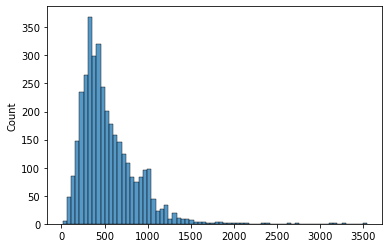

In [75]:
import seaborn as sns
ax = sns.histplot(noticias_true)

In [ ]:
ay = sns.histplot(noticia)

In [43]:
df_bow = loadCount(text_list, normalize = False)
#df_tfidf = loadTfidf(text_list)

In [44]:
df_bow.shape

(7200, 76675)

In [45]:
df_bow

,Aaron,Ab,Abacc,Abalaramse,Abalo,Abandonei,Abandonála,Abastecimento,Abate,Abdoolr,...,úmido,úmir,úncio,único,útel,útero,útil,útlimo,über,расстегаи
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Treinando o modelo

In [20]:
#Módulos para modelagem de aprendizado de máquina tradicionais

# Viabilizadores
import joblib
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline

# Algoritmos
from sklearn.svm import SVC #, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Feature selection & relatório de resultados
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

In [46]:
def assignVariables(df_features, df_complete_data):
    X = df_features.values
    y = df_complete_data['labels']
    
    return (X,y)

In [47]:
# Assignando variáveis dependentes e independentes e dividindo dados em conjunto de teste e treino

X,y = assignVariables(df_bow,complete_data)

test_size = 0.20

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size, random_state=42)

In [56]:
len(y_test)

1440

In [48]:
X.shape

(7200, 76675)

In [49]:
X_test.shape

(1440, 76675)

### Selecione um algoritmo:
0 - Logistic Regression  
1 - Naive Bayes  
2 - Gradient Boosting  
3 - Random Forests  
4 - Support Vector Machine (SVM)  

In [25]:
#X_best.shape[0]

In [26]:
y.shape

(7200,)

Logistic Regression

In [106]:
classifier = [LogisticRegression(), MultinomialNB(), GradientBoostingClassifier(), RandomForestClassifier(), SVC()]

choice = input("Insira o ID do algoritmo a ser usado para treinamento do modelo: ")
save_model = int(input('''Salvar modelo?
0 - Não
1 - Sim
'''))

classifier = classifier[int(choice)]

#feature_selection = 100

#X_best = SelectKBest(mutual_info_classif,k=feature_selection).fit_transform(X,y)

#predictions = (cross_val_predict(classifier, X_best, y, cv=5))

classifier = classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

dataset_name = str(X.shape[0])+'_news'
if save_model==1:
    model_name = (classifier.__class__.__name__ + '_' + (dataset_name + '.pkl').lower())
    classifier.fit(X_best, y)
    joblib.dump(classifier,model_name)

target_name = ['Verdadeiras','Falsas']
print(classification_report(y_test, predictions, target_names=target_name))

Insira o ID do algoritmo a ser usado para treinamento do modelo: 4
Salvar modelo?
0 - Não
1 - Sim
1
              precision    recall  f1-score   support

 Verdadeiras       0.95      0.98      0.97       722
      Falsas       0.98      0.95      0.96       718

    accuracy                           0.97      1440
   macro avg       0.97      0.97      0.97      1440
weighted avg       0.97      0.97      0.97      1440



In [112]:
freq = y_test.value_counts()
print(freq)

fake    722
true    718
Name: labels, dtype: int64


Naive Bayes

In [53]:
classifier = MultinomialNB()

#choice = input("Insira o ID do algoritmo a ser usado para treinamento do modelo: ")
#save_model = int(input('''Salvar modelo?
#0 - Não
#1 - Sim
#'''))

#classifier = classifier[int(choice)]

feature_selection = 100

X_best = SelectKBest(mutual_info_classif,k=feature_selection).fit_transform(X,y)

predictions = (cross_val_predict(classifier, X_best, y, cv=5))

dataset_name = str(X.shape[0])+'_news'
#if save_model==1:
model_name = (classifier.__class__.__name__ + '_' + (dataset_name + '.pkl').lower())
classifier.fit(X_best, y)
joblib.dump(classifier,model_name)

target_name = ['Texto','Label']
print(classification_report(y, predictions, target_names=target_name))

              precision    recall  f1-score   support

       Texto       0.73      0.67      0.70      3600
       Label       0.70      0.75      0.72      3600

    accuracy                           0.71      7200
   macro avg       0.71      0.71      0.71      7200
weighted avg       0.71      0.71      0.71      7200



Random Forests

In [54]:
classifier = RandomForestClassifier()

#choice = input("Insira o ID do algoritmo a ser usado para treinamento do modelo: ")
#save_model = int(input('''Salvar modelo?
#0 - Não
#1 - Sim
#'''))

#classifier = classifier[int(choice)]

feature_selection = 100

X_best = SelectKBest(mutual_info_classif,k=feature_selection).fit_transform(X,y)

predictions = (cross_val_predict(classifier, X_best, y, cv=5))

dataset_name = str(X.shape[0])+'_news'
#if save_model==1:
model_name = (classifier.__class__.__name__ + '_' + (dataset_name + '.pkl').lower())
classifier.fit(X_best, y)
joblib.dump(classifier,model_name)

target_name = ['Texto','Label']
print(classification_report(y, predictions, target_names=target_name))

              precision    recall  f1-score   support

       Texto       0.92      0.96      0.94      3600
       Label       0.96      0.92      0.94      3600

    accuracy                           0.94      7200
   macro avg       0.94      0.94      0.94      7200
weighted avg       0.94      0.94      0.94      7200



SVM

In [55]:
classifier = SVC()

#choice = input("Insira o ID do algoritmo a ser usado para treinamento do modelo: ")
#save_model = int(input('''Salvar modelo?
#0 - Não
#1 - Sim
#'''))

#classifier = classifier[int(choice)]

feature_selection = 100

X_best = SelectKBest(mutual_info_classif,k=feature_selection).fit_transform(X,y)

predictions = (cross_val_predict(classifier, X_best, y, cv=5))

dataset_name = str(X.shape[0])+'_news'
#if save_model==1:
model_name = (classifier.__class__.__name__ + '_' + (dataset_name + '.pkl').lower())
classifier.fit(X_best, y)
joblib.dump(classifier,model_name)

target_name = ['Texto','Label']
print(classification_report(y, predictions, target_names=target_name))

              precision    recall  f1-score   support

       Texto       0.93      0.96      0.95      3600
       Label       0.96      0.93      0.94      3600

    accuracy                           0.95      7200
   macro avg       0.95      0.95      0.95      7200
weighted avg       0.95      0.95      0.95      7200

